<a href="https://colab.research.google.com/github/huskeypm/cellmigration/blob/main/migration_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notebook for processing particle simulator results
(launched from github)

* Upload csv files from working directory to DL:
e.g.
> cp $FAUST:/home/pkekeneshuskey/source/cellmigration/run/231129/test.png.csv ~/DL/

or

> cp /home/pkekeneshuskey/source/cellmigration/run/231129/test.png.csv ~/DL/

* mount google drive to write data (just hit google drive button under Files)


* Hop to [section](#myCell) to process


In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# mount drive 1st (just for storing output images)
import os
outPath='/content/drive/MyDrive/temp/'
if os.path.exists(outPath) is False:
  print("Be sure to mount google drive")

In [8]:
!git clone https://github.com/huskeypm/cellmigration
#!cd /content/cellmigration; git pull


fatal: destination path 'cellmigration' already exists and is not an empty directory.


In [9]:
import sys
sys.path.append('/content/cellmigration')

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import processData as pdat
cases = dict()
class empty:pass

Partition file according to cases

In [15]:
dataFrameName = outPath+"all.csv"

df = pd.read_csv(dataFrameName)

In [16]:
### pull out those without ATP in the title
#new_df = df[~df["col"].str.contains(word)]
nocrowder_noatp = df.loc[
     df['trajName'].str.contains("nocrowder")  &
    ~df['trajName'].str.contains("atp")
]

nocrowder_atp = df.loc[
     df['trajName'].str.contains("nocrowder")  &
     df['trajName'].str.contains("atp")
]

crowder_noatp = df.loc[
     df['trajName'].str.contains("^crowder")  &
    ~df['trajName'].str.contains("atp")
]
#print(crowder_noatp.tail())

crowder_atp = df.loc[
     df['trajName'].str.contains("^crowder")  &
     df['trajName'].str.contains("atp")
]


### Case: no crowders

**First determine the normalization factor UNTIL I work this out analytically **

In [17]:
nocrowder_noatp

,Unnamed: 0,trajName,tag,condVal,D,flux*A(reservoir),flux*A(crowd),Vol Frac,Area Frac
262,0,nocrowder_cellAttr0.050000_00,cellAttr,0.05,0.000064,-7.329811e-07,-7.389306e-10,0.999997,0.944997
263,0,nocrowder_cellAttr0.050000_01,cellAttr,0.05,0.000023,-6.848800e-07,-7.897163e-10,0.999997,0.945175
264,0,nocrowder_cellAttr0.050000_02,cellAttr,0.05,0.000021,-7.037223e-07,-7.838820e-10,0.999997,0.947916
265,0,nocrowder_cellAttr0.050000_03,cellAttr,0.05,0.000108,-7.534914e-07,-7.551467e-10,0.999997,0.947066
266,0,nocrowder_cellAttr0.050000_04,cellAttr,0.05,-0.000039,-7.008947e-07,-7.440614e-10,0.999997,0.944738
...,...,...,...,...,...,...,...,...,...
389,0,nocrowder_yScale40.000000_00,yScale,40.00,-0.000084,-6.891031e-07,-7.629851e-10,0.999997,0.943291
390,0,nocrowder_yScale40.000000_01,yScale,40.00,0.000050,-7.035638e-07,-8.006823e-10,0.999997,0.946666
391,0,nocrowder_yScale40.000000_02,yScale,40.00,0.000033,-7.438737e-07,-6.854755e-10,0.999997,0.954106
392,0,nocrowder_yScale40.000000_03,yScale,40.00,0.000197,-6.961940e-07,-7.826860e-10,0.999997,0.941575


In [18]:
dataFrameName = "fig4.csv"
dataFrameName = "nocrowder.csv"

if False:
  df = pd.read_csv(dataFrameName)
else:
  df = nocrowder_noatp


In [53]:
key = "nCells"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.JAstds, case.vFs = pdat.ProcessGroup(df,key)

# get JA at largest vol frac
idx = np.argmax(case.vFs)
normFactor = 1/case.JAs[ idx ]
def hs(vf):
  return 2*vf/(3-vf)
normFactor*=hs( case.vFs[idx] )

case.JAs[ idx ]
print(normFactor)

[30.         37.7976315  47.62203156 60.         75.59526299 95.24406312]
-1332124.5181535506


[30.         37.7976315  47.62203156 60.         75.59526299 95.24406312]


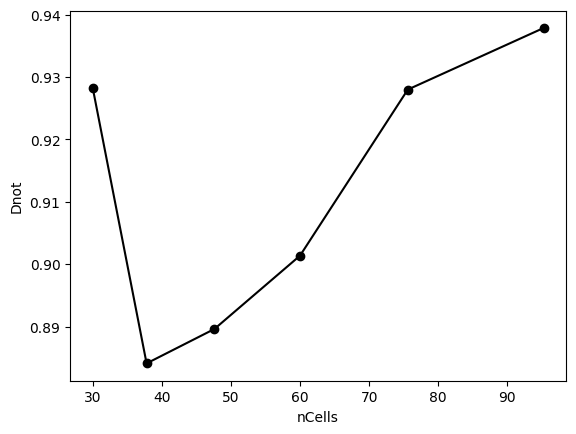

In [55]:

# get all entries with a given key name
key = "nCells"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs = pdat.ProcessGroup(df,key)
cases[key] = case

pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key)



In [ ]:
get mean position

SyntaxError: ignored

### Introduce ATP into the equation

 <a class="anchor" name="myCell"></a>



In [56]:
import pandas as pd
if False:
  dataFrameName = "nocrowder.csv"
  df = pd.read_csv(dataFrameName)
  dataFrameName = "nocrowder_atp.csv"
  dfATP = pd.read_csv(dataFrameName)
else:
  df = nocrowder_noatp
  dfATP=nocrowder_atp


In [ ]:
dfATP

,Unnamed: 0,trajName,tag,condVal,D,flux*A,Vol Frac
7,7,nocrowder_atp_cellRad3.174802_03,cellRad,3.174802,0.016289,-0.0013,0.99999
8,8,nocrowder_atp_cellRad5.039684_04,cellRad,5.039684,0.013623,-0.0012,0.99999
9,9,nocrowder_atp_nCells10.000000_04,nCells,10.000000,0.008260,-0.0009,0.99999
11,11,nocrowder_atp_cellRad2.000000_03,cellRad,2.000000,0.013582,-0.0008,0.99999
13,13,nocrowder_atp_cellRad5.039684_01,cellRad,5.039684,0.012766,-0.0012,0.99999
...,...,...,...,...,...,...,...
422,422,nocrowder_atp_cellAttr0.158740_02,cellAttr,0.158740,0.019100,-0.0013,0.99999
424,424,nocrowder_atp_nCells40.000000_04,nCells,40.000000,0.026520,-0.0024,0.99999
425,425,nocrowder_atp_cellAttr0.062996_03,cellAttr,0.062996,0.010245,-0.0015,0.99999
427,427,nocrowder_atp_nCells25.198421_02,nCells,25.198421,0.014551,-0.0016,0.99999


[ 2.5         3.14980262  3.96850263  5.          6.29960525  7.93700526
 10.        ]


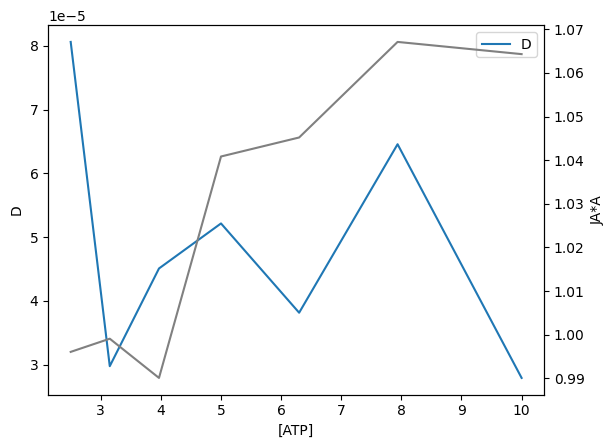

In [59]:
case = empty()
case.conds,case.Ds,case.Dstds, case.JAs,case.volFracs = pdat.ProcessGroup(dfATP,"xScale")
#dfATP.xScale

fig,axl = plt.subplots()
axl.plot(case.conds,case.Ds,label='D')
axl.set_ylabel("D")
axl.set_xlabel("[ATP]")
axl.legend(loc=0)

# we use negative -1 since negative flux is going across toward right
axr = axl.twinx()
axr.plot(case.conds,case.JAs*normFactor,'gray')
axr.set_ylabel("JA*A")

plt.gcf().savefig(outPath+"fig4_D_vs_ATP.png",dpi=300)

[30.         37.7976315  47.62203156 60.         75.59526299 95.24406312]
[75.59526299 95.24406312]
Assuming middle value is reference
x(3) = 60.000000
Assuming middle value is reference
x(1) = 95.244063


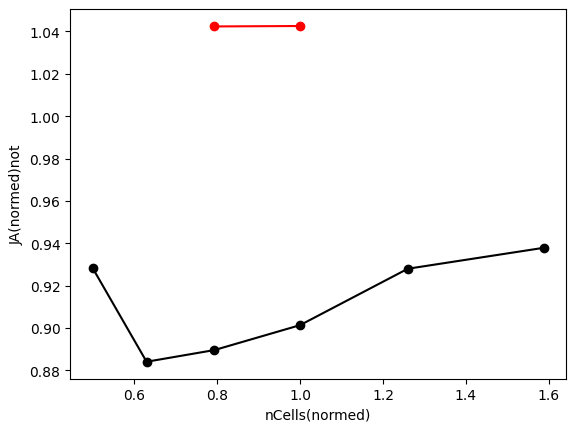

In [61]:
# plotting two sets of data
# get all entries with a given key name
key = "nCells"

case = empty()
case.conds,case.Ds,case.Dstds, case.JAs, case.vFs = pdat.ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case

print("WARNING: using incorrect stderr")
case = cases[key+"-atp"]
pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key,normalize=True,mode="JA")

case = cases[key+"+atp"]
pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key,color='r',normalize=True,mode="JA")

plt.gcf().savefig(outPath+"fig4_nCells.png",dpi=300)


In [62]:

key = "cellRad"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = pdat.ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case


case = cases[key+"-atp"]
pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key,color='k',normalize=True,mode="JA")


case = cases[key+"+atp"]
pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key,color='r',normalize=True,mode="JA")


plt.gcf().savefig(outPath+"fig4_cellRad.png",dpi=300)

RuntimeError: ignored

[0.05       0.06299605 0.07937005 0.1        0.1259921  0.15874011
 0.2       ]
[0.05       0.06299605 0.07937005 0.1        0.1259921  0.15874011
 0.2       ]
Assuming middle value is reference
x(3) = 0.100000
Assuming middle value is reference
x(3) = 0.100000


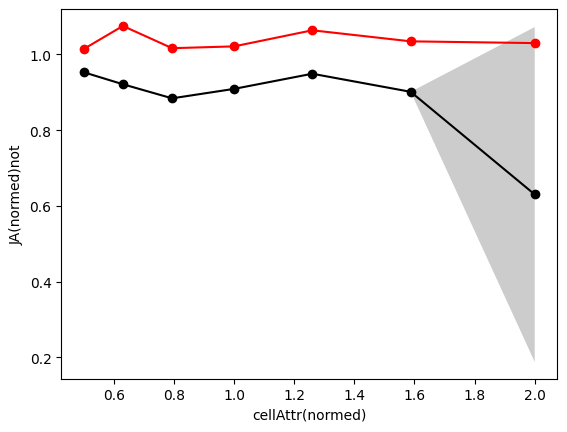

In [63]:
key = "cellAttr"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = pdat.ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case


case = cases[key+"-atp"]
pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key,color='k',normalize=True,mode="JA")


case = cases[key+"+atp"]
pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key,color='r',normalize=True,mode="JA")


plt.gcf().savefig(outPath+"fig4_cellAttr.png",dpi=300)

## CROWDERS WITH ATP

In [64]:
if False:
  dataFrameName = "crowder.csv"
  df = pd.read_csv(dataFrameName)
  dataFrameName = "crowder_atp.csv"
  dfATP = pd.read_csv(dataFrameName)
else:
  df = crowder_noatp
  dfATP = crowder_atp



[18.]
[18.]
Assuming middle value is reference
x(0) = 18.000000
Assuming middle value is reference
x(0) = 18.000000


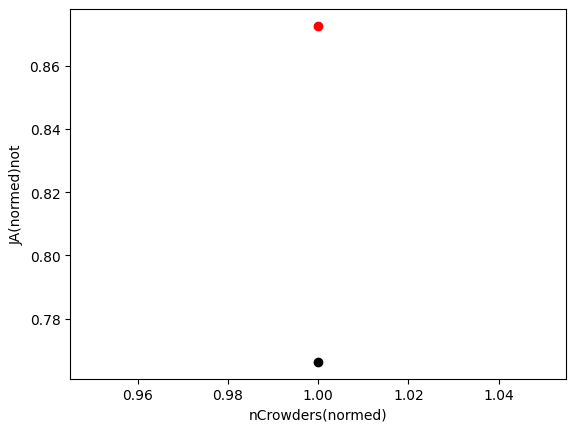

In [65]:
key = "nCrowders"

case = empty()
case.conds,case.Ds,case.Dstds, case.JAs, case.vFs  = pdat.ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds, case.JAs, case.vFs  = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case



case = cases[key+"-atp"]
#PlotKey(case.conds,case.Ds,case.Dstds,key,normalize=False)
pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key,color='k',normalize=True,mode="JA")

case = cases[key+"+atp"]
#PlotKey(case.conds,case.Ds,case.Dstds,key,color='r',normalize=False)
pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key,color='r',normalize=True,mode="JA")


plt.gcf().savefig(outPath+"fig5_nCrowders.png",dpi=300)


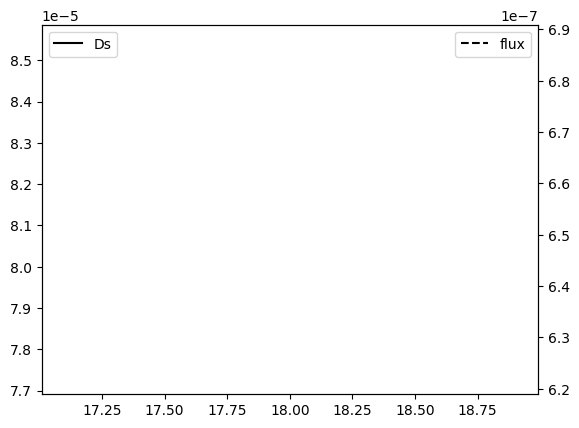

In [66]:
fig, axl = plt.subplots()
axl.plot(case.conds,case.Ds,'k-',label="Ds")
axl.legend(loc=2)
axr=axl.twinx()
axr.plot(case.conds,case.JAs*normFactor,'k--',label="flux")
axr.legend(loc=0)


[ 0.1         5.          6.29960525  7.93700526 10.        ]
JAs [-6.96497252e-07 -6.32559534e-07 -6.55097731e-07 -6.02223050e-07
 -5.62141493e-07] [0.92782107 0.84264807 0.87267175 0.80223609 0.74884247]
NEED TO ADJUST FOR ACTUAL CALCULTION 
[ 0.1         5.          6.29960525  7.93700526 10.        ]
+ATP JAs [1.05145034 0.99002942 0.95886861 0.9223442  0.87159905]


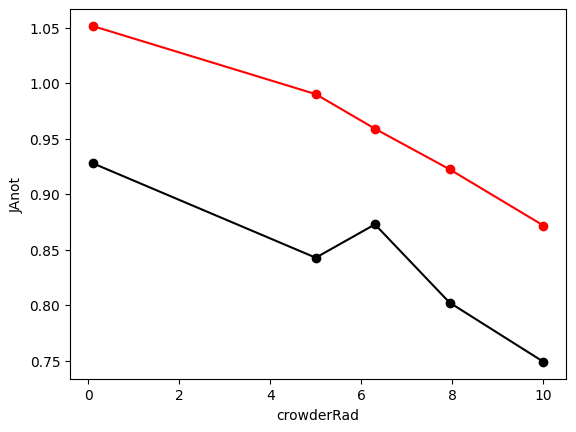

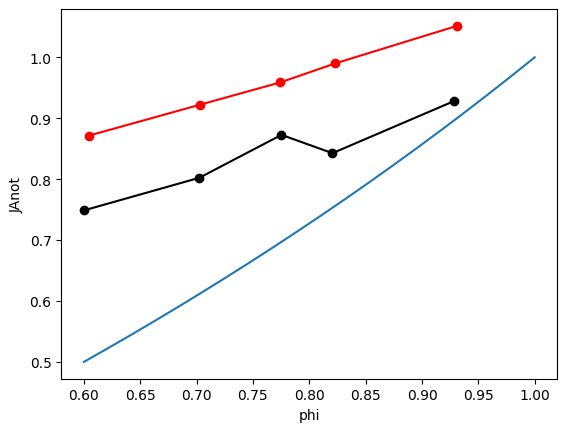

In [69]:
key = "crowderRad"

vfs = np.linspace(0.6,1.,20)
hs = 2*vfs/(3-vfs)


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = pdat.ProcessGroup(df,key)
cases[key+"-atp"] = case

#print('JAs',case.JAs)
print('JAs',case.JAs, case.JAs*normFactor)
print("NEED TO ADJUST FOR ACTUAL CALCULTION ")

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case
print('+ATP JAs',case.JAs*normFactor)

case = cases[key+"-atp"]
#pdat.PlotKey(case.conds,case.Ds,case.Dstds,key,normalize=False)
pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key,normalize=False,mode="JA")

case = cases[key+"+atp"]
#pdat.PlotKey(case.conds,case.Ds,case.Dstds,key,color='r',normalize=False)
pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key,color='r',normalize=False,mode="JA")

plt.gcf().savefig(outPath+"fig5_crowderRad.png",dpi=300)


plt.figure()
case = cases[key+"-atp"]
pdat.PlotKey(case.vFs,case.JAs*normFactor,case.Dstds,key,normalize=False, mode="JA",altName="phi")

case = cases[key+"+atp"]
pdat.PlotKey(case.vFs,case.JAs*normFactor,case.Dstds,key,color='r',normalize=False,mode="JA",altName="phi")
plt.plot(vfs,hs)
plt.gcf().savefig(outPath+"fig5_crowderRad2.png",dpi=300)


[0.05       0.06299605 0.07937005 0.1        0.1259921  0.15874011
 0.2       ]
[0.05       0.06299605 0.07937005 0.1        0.1259921  0.15874011
 0.2       ]
Assuming middle value is reference
x(3) = 0.100000
Assuming middle value is reference
x(3) = 0.100000


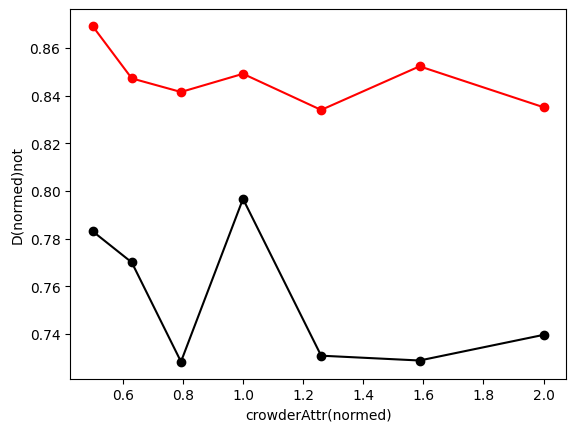

In [68]:
key = "crowderAttr"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = pdat.ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case


case = cases[key+"-atp"]
pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key,normalize=True)

case = cases[key+"+atp"]
pdat.PlotKey(case.conds,case.JAs*normFactor,case.Dstds,key,color='r',normalize=True)

plt.gcf().savefig(outPath+"fig5_crowderAttr.png",dpi=300)

## Continuum data

- Run master on kant (test07-test10)
- See paper notes for more detail on repository
../solutions/test07/smol/0001/info.yaml:Deff_membrane: 0.49443361495120397
../solutions/test08/smol/0001/info.yaml:Deff_membrane: 0.7730293910002057
../solutions/test09/smol/0001/info.yaml:Deff_membrane: 0.7963113880422519
../solutions/test10/smol/0001/info.yaml:Deff_membrane: 0.9866307129197737
Singularity> grep phi_memb ../solutions/test*/smol/0001/info.yaml
../solutions/test07/smol/0001/info.yaml:phi_membrane: 0.6681145173651292
../solutions/test08/smol/0001/info.yaml:phi_membrane: 0.8539840575456275
../solutions/test09/smol/0001/info.yaml:phi_membrane: 0.8772177500681925
../solutions/test10/smol/0001/info.yaml:phi_membrane: 0.9933862126810031


In [ ]:
import matplotlib.pylab as plt
import numpy as np
phis = np.array([0.4108862126810036, 0.6681145173651292, 0.8539840575456275, 0.8772177500681925, 0.9933862126810031])
Ds = np.array([0.403642231410656, 0.49443361495120397, 0.7730293910002057, 0.7963113880422519, 0.9866307129197737])

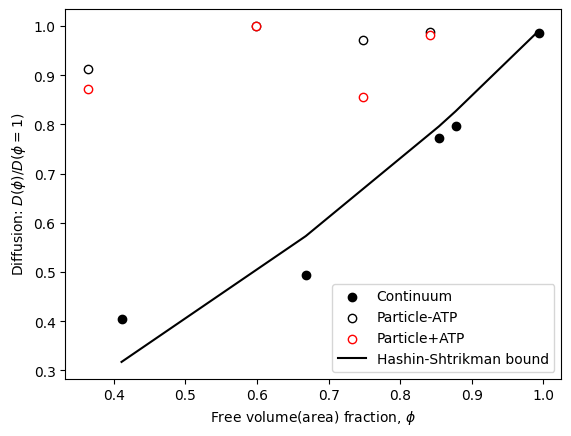

In [ ]:



plt.scatter(phis,Ds,facecolor='k',label="Continuum")

case = cases['crowderRad'+"-atp"]
plt.scatter(case.vFs,case.Ds/np.max(case.Ds),facecolor='w',edgecolor='k',
            label="Particle-ATP")
case = cases['crowderRad'+"+atp"]
plt.scatter(case.vFs,case.Ds/np.max(case.Ds),facecolor='w',edgecolor='r',
            label="Particle+ATP")


plt.plot(phis,2*phis/(3-phis),'k',label="Hashin-Shtrikman bound")
plt.legend(loc=0)
plt.xlabel("Free volume(area) fraction, $\phi$")
plt.ylabel("Diffusion: $D(\phi)/D(\phi=1)$")

plt.gcf().savefig(outPath+"fig7_DvsPhi.png",dpi=300)


Widths

Created test11-13
/info.yaml
totflux_A_pore: 0.05925859045541587
pkekeneshuskey@kant:requests/$ grep totflux_A_pore ../solutions/test12/smol/0001/info.yaml
totflux_A_pore: 0.07531812128985557
pkekeneshuskey@kant:requests/$ grep totflux_A_pore ../solutions/test13/smol/0001/info.yaml
totflux_A_pore: 0.0876739876632738


5, 7, and 9 pore widths; assuming it's 11 high



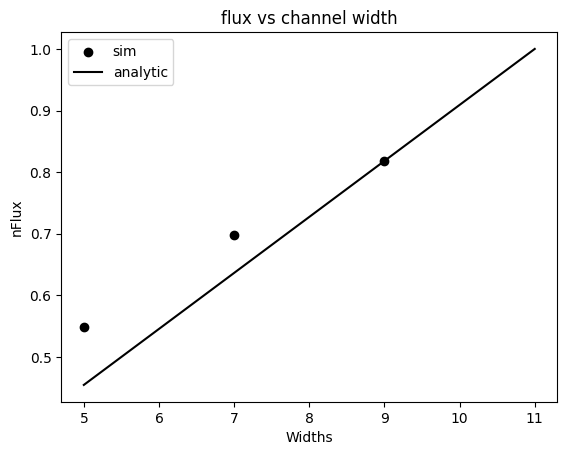

In [ ]:
widths=[5,7,9]
fluxes = np.array([0.059,0.075,0.088])
max=11 # include this in widths next time
print("WARNING: use actual value")
maxFlux = fluxes[2]*max/widths[2]

import matplotlib.pylab as plt
import numpy as np
plt.scatter(widths,fluxes/maxFlux, facecolor='k',label="sim")
validwidths = np.array([5,7,9,max])
plt.plot(validwidths,validwidths/max,'k',label='analytic')
plt.ylabel("nFlux")
plt.xlabel("Widths")
plt.title("flux vs channel width")
plt.legend(loc=0)


plt.gcf().savefig(outPath+"fig7_JvsW.png",dpi=300)


In [ ]:
maxFlux

1.0755555555555556